# Solo Project 125

## Research Question
Which US county was the best Bellwether in the past 5 presidential elections (2000-2016)?

# Initial Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_prep(url):
    idf = (
        pd.read_csv(url)
    )
    df = (
        idf
            .drop(idf[idf["party"] == "green"].index)
            .dropna()
            .drop(columns=["version", "FIPS", "state", "office"])
            .reset_index()
    )
    return df

This initial import and clean does two main things:
- Imports the Dataset from a local csv file
- Removes any unnecesary information, like columns and results from Independent and Green party candidates
This helps answer the research question by prepping the data for analysis, since all the data that doesn't help directly answer the question is removed

## Determine Winner by County

This part of my analysis determines whether or not the Democratic candidate won in each county. The data had a column in each row for how many votes a candidate received in each county, but to actually determine who won those counties the values had to be compared across two rows. I achieved this by splitting the dataframe into two separate dataframes aligned so the votes received by the democrat and the republican were in one row, with each row representing the original counties. I then combined the two columns into a third dataframe and created a column there that would determine whether the Democrat won or not. I then added this new win column to the dataframe with democratic counties.

In [13]:
df = load_prep(
    "/Users/gor154/Documents/Workspaces.nosync/COSC 301 Git/course-project-solo_125/data/raw/countypres_2000-2016.csv")
df['percent'] = df['candidatevotes'] / df['totalvotes'] * 100
df2 = df[df.index % 2 == 0]
df1 = df[df.index % 2 != 0]
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = pd.concat([df1['percent'], df2['percent']], axis=1, keys=["Rep_per", "Dem_per"])
# A win will be defined by the Democrat winning for simplicity's sake
df3['win'] = df3['Dem_per'] > df3['Rep_per']
df2['win'] = df3['win']
def func():
    return df2

This helps me get to answering my research question by pairing down the data to a pure analysis of County names and boolean values, leaving me to only use a small dataset of which candidate won each presidential election to answer my question.

### Visualizations
The two images here are from the EDA, and demonsrate where states lean politically in terms of the individual leanings of their counties. The Democratic chart indicates how much a state tends to favor the Democratic Party, while the Republican chart illustrates how much a state has favored the Republican Party in the past 5 elections. These don't bring me particularly closer to my research question, but my question is very specific, and an effective visualization can only be created once I have my final dataset.

Text(0.5, 1.0, 'Democratic Leaning of States')

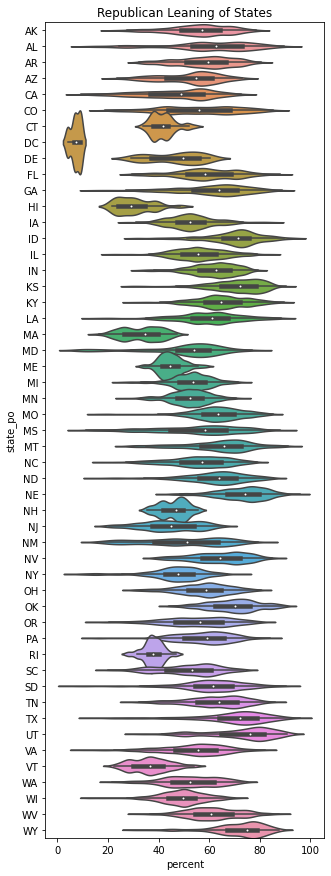

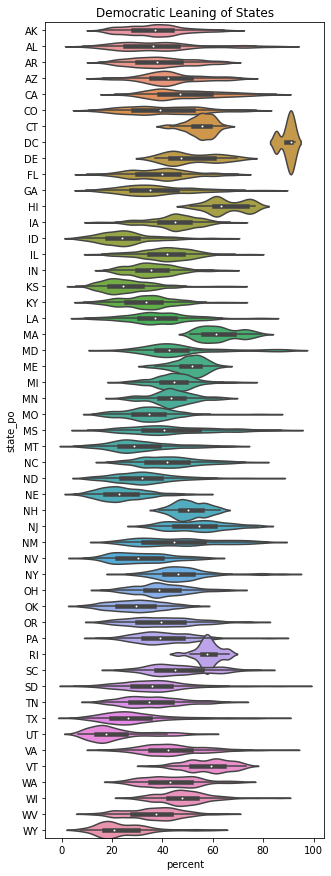

In [8]:
df = load_prep("/Users/gor154/Documents/Workspaces.nosync/COSC 301 Git/course-project-solo_125/data/raw/countypres_2000-2016.csv")
df['percent'] = df['candidatevotes']/df['totalvotes']*100
df2 = df[df.index % 2 == 0]
df1 = df[df.index%2 != 0]
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df1.melt(id_vars=["state_po","percent"]).sort_values(by=['state_po'])
df3 = df3.drop(columns=["variable","value"])
plt.figure(figsize=(5, 15))
sns.violinplot(data=df3,x="percent",y="state_po",width=4).set_title('Republican Leaning of States')
df4 = df2.melt(id_vars=["state_po","percent"]).sort_values(by=['state_po'])
df4 = df4.drop(columns=["variable","value"])
plt.figure(figsize=(5, 15))
sns.violinplot(data=df4,x="percent",y="state_po",width=4).set_title('Democratic Leaning of States')

## Final processing

This script pulled in the data about whether each county voted for the Democratic candidate in each election and combined it with a dataFrame of my creation that represents whether the Democrat won the entire Presidential election. With the two DataFrames mergeed, it was possible to determine how many times each county voted for the winner of the election. I then sorted the counties by amount of correct predictions, and then cut off all the counties that got less than 5 (out of the past 5) elections correct. This final list is seen in data/processed.

In [17]:
df = func()
data = {'year':[2000,2004,2008,2012,2016],"Winner":[False,False,True,True,False]}
df_wins = pd.DataFrame(data)
df = df.merge(df_wins,on='year')
df["cor_pred"] = (df["win"] == df["Winner"])
df["cor_pred"] = df["cor_pred"].astype("int32")
df_save=df
df = df.groupby(["state_po","county"])["cor_pred"].sum().reset_index().sort_values(by='cor_pred',ascending=False).reset_index(drop=True)
df_final = df.loc[df['cor_pred']==5]
df_final

,state_po,county,cor_pred
0,NH,Hillsborough,5
1,OH,Sandusky,5
2,DE,Kent,5
3,OH,Ottawa,5
4,WA,Clallam,5
...,...,...,...
3145,PA,Washington,1
3146,PA,Fayette,1
3147,TN,Perry,1
3148,TN,Overton,1


,state_po,county,cor_pred
0,NH,Hillsborough,5
1,OH,Sandusky,5
2,DE,Kent,5
3,OH,Ottawa,5
4,WA,Clallam,5
...,...,...,...
57,SC,Colleton,5
58,SC,Calhoun,5
59,IA,Allamakee,5
60,VA,Buckingham,5


## Getting Data Ready for Tableau

In [31]:
df_save["Demnum"] = ((df_save["win"]==True)&(df_save["win"] == df_save["Winner"])).astype("int32")
df_save["Repnum"] = ((df_save["win"]==False)&(df_save["win"] == df_save["Winner"])).astype("int32")
df_rep = df_save.groupby(["state_po","county"])["Repnum"].sum().reset_index().sort_values(by='Repnum',ascending=False).reset_index(drop=True)
df_dem = df_save.groupby(["state_po","county"])["Demnum"].sum().reset_index().sort_values(by='Demnum',ascending=False).reset_index(drop=True)
df=df.merge(df_rep,on=["county","state_po"])
df=df.merge(df_dem,on=["county","state_po"])
display(df)
df.to_csv("tableau_ready.csv")

,state_po,county,cor_pred,Repnum_x,Demnum_x,Repnum_y,Demnum_y
0,NH,Hillsborough,5,3,2,3,2
1,OH,Sandusky,5,3,2,3,2
2,DE,Kent,5,3,2,3,2
3,OH,Ottawa,5,3,2,3,2
4,WA,Clallam,5,3,2,3,2
...,...,...,...,...,...,...,...
3145,PA,Washington,1,1,0,1,0
3146,PA,Fayette,1,1,0,1,0
3147,TN,Perry,1,1,0,1,0
3148,TN,Overton,1,1,0,1,0
